In [1]:
# Let's use titanic again.. for fun


In [2]:
import os 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 


In [4]:
path = "../data/titanic.csv"

titanic = pd.read_csv(path)
# to take a peek at the data
# .head() returns the first 5 rows of the dataframe
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,1,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
1,1,0,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,NaN,NaN,"Haverford, PA / Cooperstown, NY"
2,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
3,1,0,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C,NaN,122.0,"Lexington, MA"
4,1,1,"Spedden, Mr.. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY"


In [6]:
#take a peek
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
#what is missing?

def missingdata(newtable):
    print("These columns have missing records")
    print(pd.isnull(titanic).sum())
    print(" ")
        

In [6]:
missingdata(titanic)

Missing records in titanic
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64
 


In [9]:
#I don't want all the columns
titanic.drop(['name', 'sibsp', 'parch', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1, inplace = True)

In [8]:
titanic.head()

,pclass,survived,sex,age,fare,embarked
0,3,1,female,24.0,19.2583,C
1,1,0,male,61.0,262.3750,C
2,1,1,female,48.0,262.3750,C
3,1,0,male,58.0,113.2750,C
4,1,1,male,6.0,134.5000,C


In [9]:
titanic.columns

Index(['pclass', 'survived', 'sex', 'age', 'fare', 'embarked'], dtype='object')

In [10]:
#create x y for a model
X = titanic.loc[:, titanic.columns != 'survived']
y = titanic['survived']

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   fare      1308 non-null   float64
 5   embarked  1307 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 61.5+ KB


In [11]:
# Column transformers

#numeric_features = [
 #'pclass',
 #'age',
 #'fare'
 #]

numeric_features = X.select_dtypes(include=[np.number]).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))    
    ])
numeric_features

Index(['pclass', 'age', 'fare'], dtype='object')

In [12]:
#categorical_features = [
#    'sex',
#    'embarked']

categorical_features = X.select_dtypes(exclude=[np.number]).columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
categorical_features

Index(['sex', 'embarked'], dtype='object')

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [14]:
#Steps 1,2,3
lo_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver = 'liblinear'))])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1955, test_size=0.3)

#Step 4
lo_clf.fit(X_train, y_train)

#Step 5
y_model_lo = lo_clf.predict(X_test)





In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
report = classification_report(y_test, y_model_lo)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       236
           1       0.77      0.76      0.76       157

    accuracy                           0.81       393
   macro avg       0.80      0.80      0.80       393
weighted avg       0.81      0.81      0.81       393



In [17]:
accuracy_score(y_test, y_model_lo)

0.811704834605598

In [18]:
conf = confusion_matrix(y_test, y_model_lo)

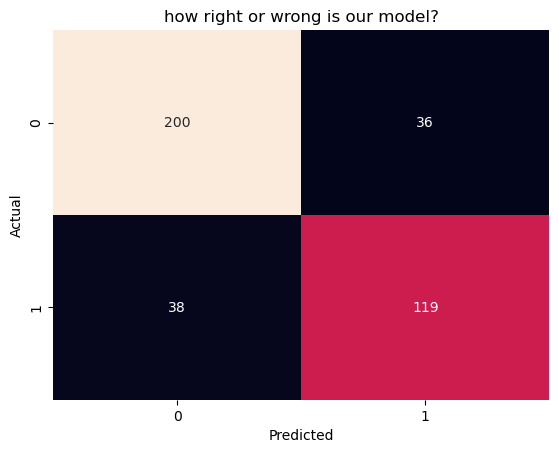

In [19]:
plt.title('how right or wrong is our model?')
sns.heatmap(conf, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

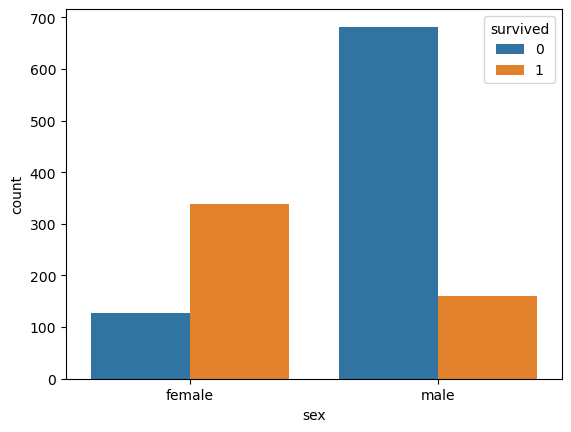

In [20]:
sns.countplot(x='sex', hue='survived', data= titanic)

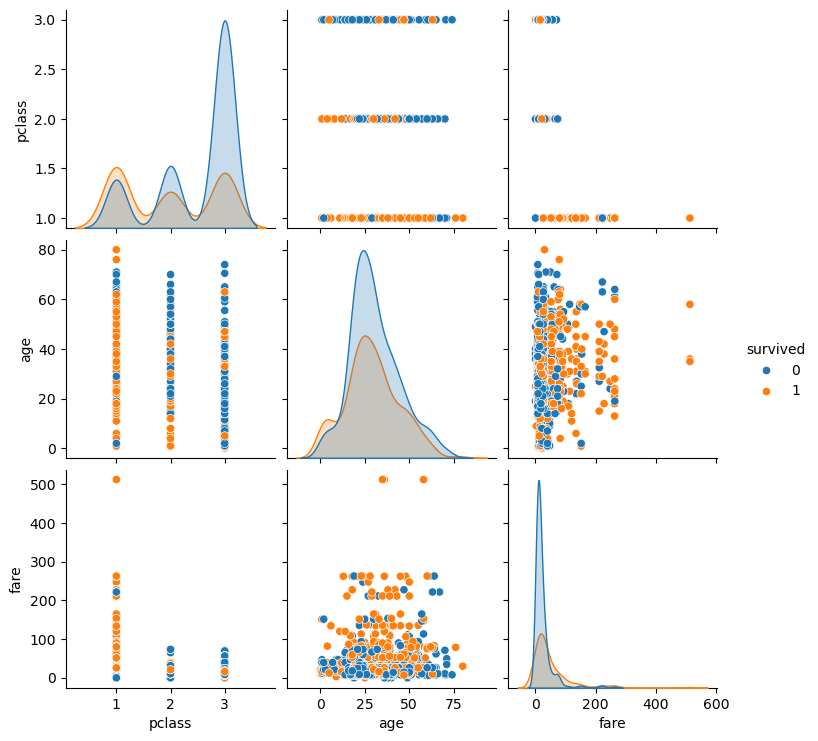

In [21]:
sns.pairplot(titanic, hue='survived')

In [22]:
plt.figure(figsize=(10,10))
titanic_corr = titanic.corr()
sns.heatmap(titanic_corr, annot=True)
plt.show()

ValueError: could not convert string to float: 'female'

<Figure size 1000x1000 with 0 Axes>